<a href="https://colab.research.google.com/github/KS0999/ML/blob/main/non_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from matplotlib import  pyplot as plt

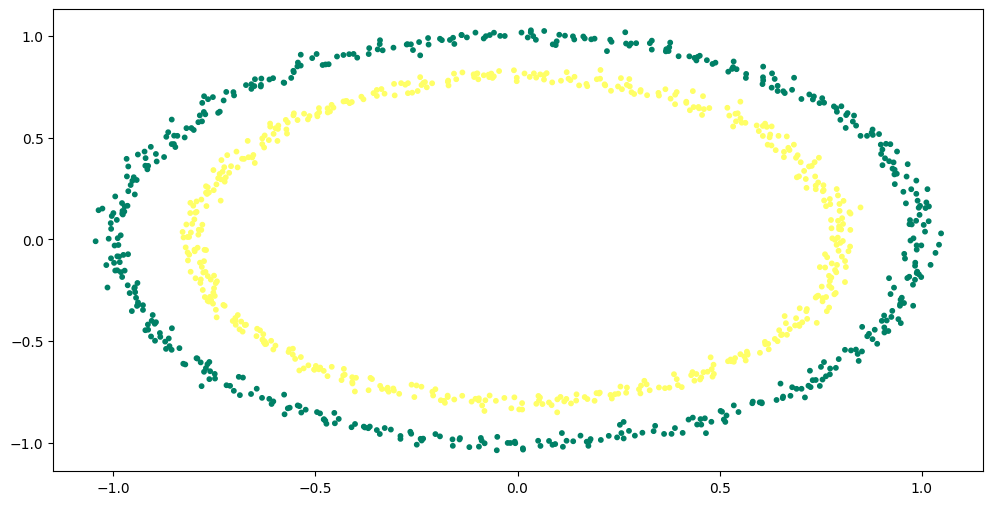

In [38]:
from sklearn.datasets import make_circles
import matplotlib.colors

X,y=make_circles(n_samples = 1000,
                 noise = 0.02,
                 random_state=1)
plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1],s=10,c=y,cmap='summer')

In [39]:
X=torch.from_numpy(X).type(torch.float32)
y=torch.from_numpy(y).type(torch.float32)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              train_size=0.8,
                                              random_state=1)
len(X_test),len(y_test),len(X_train),len(y_train)

(200, 200, 800, 800)

In [41]:
class CircleModel_nonLinear (nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(in_features=2,out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10,out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10,out_features=1)
      )
  def forward(self,x):
    return self.layer1(x)
model = CircleModel_nonLinear()
model

CircleModel_nonLinear(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [42]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model.parameters(),
                             lr = 0.1)

In [43]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [45]:
X_test,y_test = X_test.to(device),y_test.to(device)
X_train,y_train = X_train.to(device),y_train.to(device)
print(f"X_test device {X_test.device}  ,y_test device {y_test.device}")
print(f"X_train device {X_train.device},y_train device {y_train.device}")
print("-"*50)
print(f"X_test shape {X_test.shape},y_test shape {y_test.shape}")
print(f"X_train shape {X_train.shape},y_train shape {y_train.shape}")

X_test device cpu  ,y_test device cpu
X_train device cpu,y_train device cpu
--------------------------------------------------
X_test shape torch.Size([200, 2]),y_test shape torch.Size([200])
X_train shape torch.Size([800, 2]),y_train shape torch.Size([800])


In [49]:
torch.manual_seed(1)
epochs = 1000

for epoch in range(epochs):
  model.train()
  # do the forward pass
  y_logit = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logit))
  # calculate the accuracy
  loss = loss_fn(y_logit,y_train)
  acc = accuracy_fn (y_true=y_train,
                     y_pred=y_pred)
  # optimizer zero grad
  optimizer.zero_grad()
  # loss backward
  loss.backward()
  # optimizer step
  optimizer.step()

  # evaluate model
  model.eval()
  # do the forward pass
  with torch.inference_mode():
    test_logit = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logit))
  # calculate the loss
    test_loss = loss_fn(test_logit,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)
  if (epoch % 100 ==0):
    print(f"Epochs = {epoch}, loss = {loss:.5f},acc = {acc} %, test_loss = {test_loss:.5f}, test_acc = {test_acc} %")

Epochs = 0, loss = 0.67440,acc = 56.25 %, test_loss = 0.67446, test_acc = 55.50000000000001 %
Epochs = 100, loss = 0.66729,acc = 60.75000000000001 %, test_loss = 0.66654, test_acc = 57.49999999999999 %
Epochs = 200, loss = 0.65788,acc = 62.625 %, test_loss = 0.65641, test_acc = 60.5 %
Epochs = 300, loss = 0.64288,acc = 63.87500000000001 %, test_loss = 0.64218, test_acc = 60.0 %
Epochs = 400, loss = 0.61636,acc = 71.125 %, test_loss = 0.61682, test_acc = 69.5 %
Epochs = 500, loss = 0.55473,acc = 85.625 %, test_loss = 0.56030, test_acc = 83.0 %
Epochs = 600, loss = 0.44030,acc = 97.0 %, test_loss = 0.45728, test_acc = 96.0 %
Epochs = 700, loss = 0.30834,acc = 98.75 %, test_loss = 0.32782, test_acc = 97.0 %
Epochs = 800, loss = 0.49090,acc = 69.125 %, test_loss = 0.52098, test_acc = 64.0 %
Epochs = 900, loss = 0.34543,acc = 78.25 %, test_loss = 0.38893, test_acc = 80.0 %


In [47]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

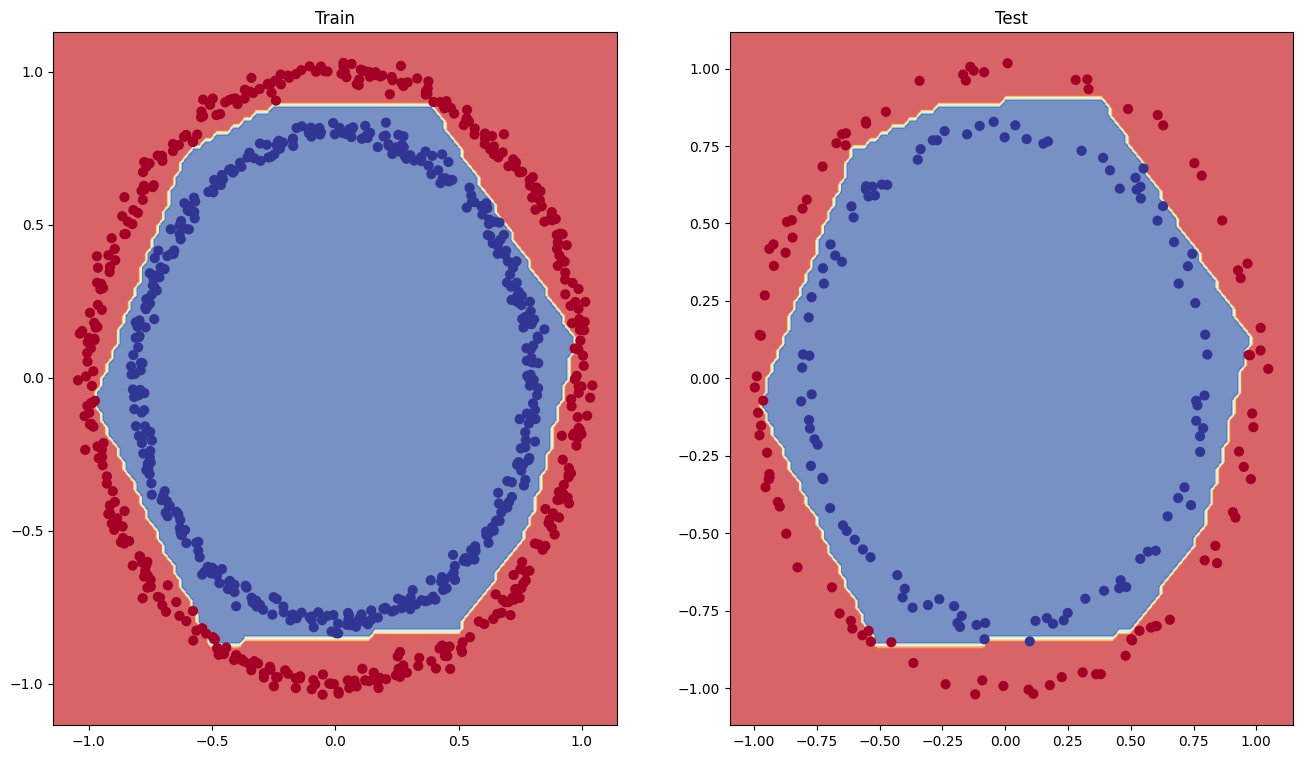

In [50]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)